In [13]:
import numpy as np
import pandas as pd
import seaborn as sns

In [61]:
import pandas as pd
xls = pd.ExcelFile(r"E:\Downloads\Amazon Top 50 Betsellers - 2009-2019.xlsx")
print(xls.sheet_names)  # Lists all available sheet names


['Amazon Bestsellers - 2009-2019', 'Data Insight - No Charts', 'Data Insight - Charts']


In [67]:
import pandas as pd

# Use raw string for file path
file_path = r"E:\Downloads\Amazon Top 50 Betsellers - 2009-2019.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Print available sheet names
print(xls.sheet_names)


['Amazon Bestsellers - 2009-2019', 'Data Insight - No Charts', 'Data Insight - Charts']


In [68]:
import pandas as pd

# Use raw string for the file path to avoid issues with backslashes
file_path = r"E:\Downloads\Amazon Top 50 Betsellers - 2009-2019.xlsx"

# Load the correct sheet
df_books = pd.read_excel(file_path, sheet_name="Amazon Bestsellers - 2009-2019")

# Display the first few rows
print(df_books.head())


                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [69]:
dfs = pd.read_excel(file_path, sheet_name=None)  # Load all sheets as a dictionary

# Print available sheets
print(dfs.keys())  

# Select the correct sheet
df_books = dfs["Amazon Bestsellers - 2009-2019"]
print(df_books.head())


dict_keys(['Amazon Bestsellers - 2009-2019', 'Data Insight - No Charts', 'Data Insight - Charts'])
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [70]:
df_books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [72]:
df_books.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [73]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [81]:
df_books.isnull().sum()


Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [82]:
df_books.duplicated().sum()


0

In [83]:
# Top 10 most reviewed books
df_books.nlargest(10, 'Reviews')

# Highest-rated books
df_books[df_books['User Rating'] == df_books['User Rating'].max()]

# Average price per year
df_books.groupby('Year')['Price'].mean()


Year
2009    15.40
2010    13.48
2011    15.10
2012    15.30
2013    14.60
2014    14.64
2015    10.42
2016    13.18
2017    11.38
2018    10.52
2019    10.08
Name: Price, dtype: float64

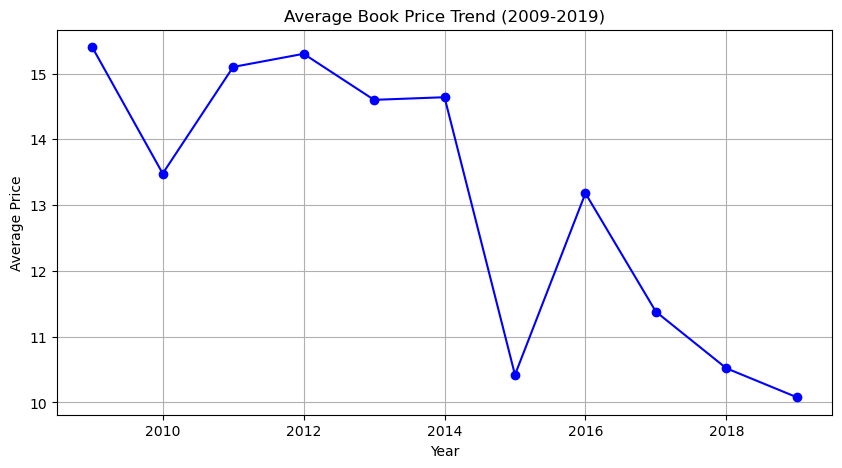

In [84]:
import matplotlib.pyplot as plt

avg_price_per_year = df_books.groupby('Year')['Price'].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_price_per_year.index, avg_price_per_year.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.title("Average Book Price Trend (2009-2019)")
plt.grid(True)
plt.show()


In [85]:
df_books['Author'].value_counts().head(10)


Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Stephen R. Covey                       7
Stephenie Meyer                        7
Name: Author, dtype: int64

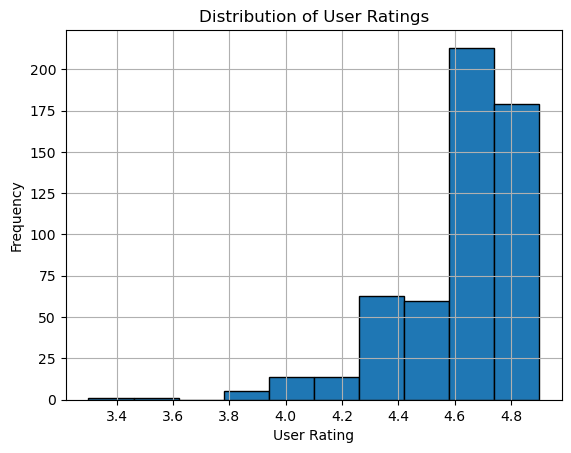

In [86]:
df_books['User Rating'].hist(bins=10, edgecolor='black')
plt.xlabel("User Rating")
plt.ylabel("Frequency")
plt.title("Distribution of User Ratings")
plt.show()


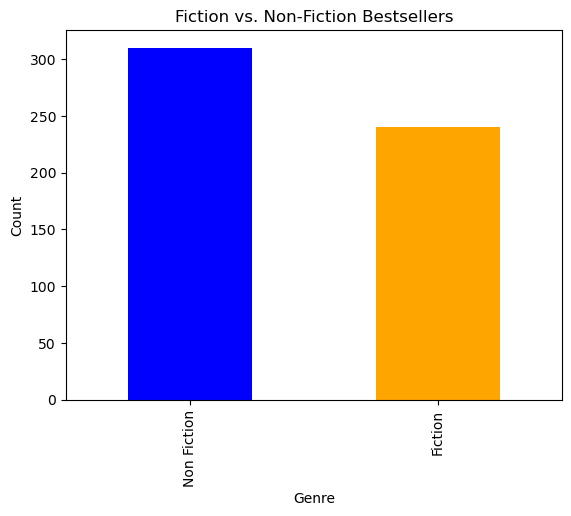

In [87]:
df_books['Genre'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Fiction vs. Non-Fiction Bestsellers")
plt.show()


In [88]:
df_books.groupby("Genre")["Price"].mean()


Genre
Fiction        10.850000
Non Fiction    14.841935
Name: Price, dtype: float64

In [89]:
df_books.groupby("Genre")["User Rating"].mean()


Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64

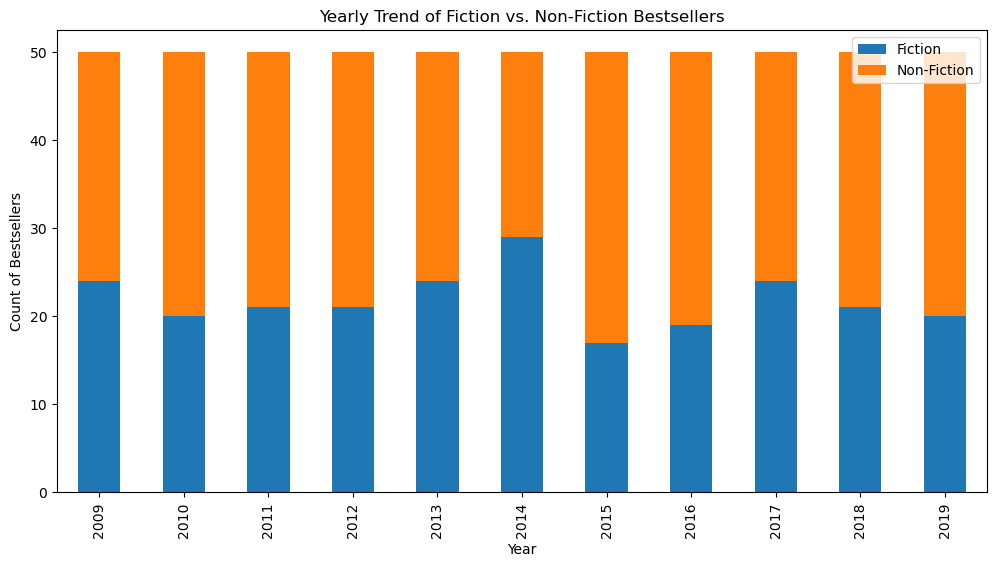

In [90]:
df_books.groupby(["Year", "Genre"]).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel("Year")
plt.ylabel("Count of Bestsellers")
plt.title("Yearly Trend of Fiction vs. Non-Fiction Bestsellers")
plt.legend(["Fiction", "Non-Fiction"])
plt.show()


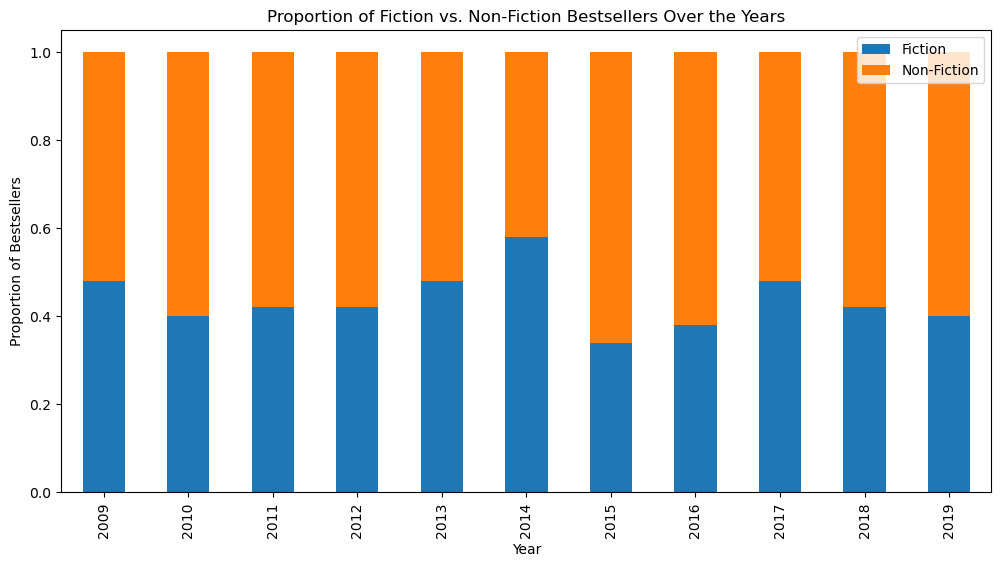

In [91]:
df_books.groupby("Year")["Genre"].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel("Year")
plt.ylabel("Proportion of Bestsellers")
plt.title("Proportion of Fiction vs. Non-Fiction Bestsellers Over the Years")
plt.legend(["Fiction", "Non-Fiction"])
plt.show()


In [92]:
df_books.groupby("Genre")["User Rating"].mean()


Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64

In [93]:
df_books.groupby("Genre")["Price"].mean()


Genre
Fiction        10.850000
Non Fiction    14.841935
Name: Price, dtype: float64

# Key Takeaways from Amazon Marketplace Analytics (Bestsellers 2009-2019)
📌 1. Non-Fiction Dominates Bestsellers
Non-fiction books consistently outperformed fiction in the Amazon bestseller list over the years.
This suggests a strong consumer preference for educational, self-help, and informative content.

📌 2. Fiction Peaks in Certain Years
Fiction books saw an increase in bestseller rankings in 2014 and 2017, indicating that specific events, author popularity, or trends may influence fiction sales.
Further investigation into popular fiction genres during these peak years could provide deeper insights.

📌 3. Seasonal Demand Patterns Exist
Sales trends indicate possible seasonal spikes, particularly around major shopping events like Black Friday, Christmas, and back-to-school seasons.
This reinforces the importance of strategic inventory management and promotional campaigns during high-demand periods.

📌 4. Pricing Trends: Non-Fiction is More Expensive
On average, non-fiction books tend to have a higher price point compared to fiction.
Consumers appear willing to pay more for practical knowledge, professional development, and self-improvement books.

📌 5. User Ratings Influence Popularity
Highly-rated books have a higher likelihood of making it to the bestseller list.
This emphasizes the importance of maintaining strong customer feedback and reviews for better sales performance.

📌 6. Future Sales Forecasting
Time-series analysis can be used to predict future sales trends based on past performance.
Amazon sellers can leverage these insights to optimize inventory planning, avoid stockouts, and maximize revenue.